In [1]:
import pandas as pd 
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset as csv file
data = pd.read_csv("haemoglobin_test.csv")
data

,Name,Age,Gender,Weight,Hb(gms%),BP(mmHg),Blood Group,result
0,Chinnaswamy D.,19,0,80,15.7,110/80,A+,1
1,Nikhil Raj,22,0,102,16.6,130/70,O+,1
2,Sharvesh Vikranth,19,0,89,15.6,142/80,A+,1
3,G. Narendran,33,0,92,14.1,142/82,O+,1
4,Pradesh Yadav,19,0,64,14.1,100/70,AB+,1
...,...,...,...,...,...,...,...,...
207,Surya,43,0,60,16.0,130/74,B+,1
208,Cinna,26,0,75,13.0,120/84,A+,1
209,Chakri,28,0,55,12.0,100/84,B+,0
210,Balaraju,41,0,104,14.0,130/94,A+,1


In [3]:
data_modf = data.drop(columns=['Name','Blood Group','BP(mmHg)'])
data_modf

,Age,Gender,Weight,Hb(gms%),result
0,19,0,80,15.7,1
1,22,0,102,16.6,1
2,19,0,89,15.6,1
3,33,0,92,14.1,1
4,19,0,64,14.1,1
...,...,...,...,...,...
207,43,0,60,16.0,1
208,26,0,75,13.0,1
209,28,0,55,12.0,0
210,41,0,104,14.0,1


In [4]:
# shuffle the DataFrame rows
from sklearn.utils import shuffle
data_shuff = shuffle(data)
data_shuff

,Name,Age,Gender,Weight,Hb(gms%),BP(mmHg),Blood Group,result
149,Vijaya Lakshmi,22,1,49,10.0,120/80,A+,0
117,Arpita,27,1,51,9.0,140/91,O+,0
59,Tejaswi V. Panchgula,20,0,81,13.4,130/70,A+,1
15,Obilesh Sai,20,0,72,14.2,130/90,B+,1
157,Rajendra,28,0,79,15.0,140/93,O+,1
...,...,...,...,...,...,...,...,...
93,Ananya,24,1,71,17.0,130/60,B+,0
134,Kishore,22,0,94,9.0,120/82,A+,0
143,Ruchitha,21,1,43,10.0,102/82,A+,0
95,Ashish,18,0,56,9.0,100/61,B+,0


In [5]:
data_modf = data.drop(columns=['Name','Blood Group','BP(mmHg)'])
data_modf

,Age,Gender,Weight,Hb(gms%),result
0,19,0,80,15.7,1
1,22,0,102,16.6,1
2,19,0,89,15.6,1
3,33,0,92,14.1,1
4,19,0,64,14.1,1
...,...,...,...,...,...
207,43,0,60,16.0,1
208,26,0,75,13.0,1
209,28,0,55,12.0,0
210,41,0,104,14.0,1


In [6]:
x_train = data_modf[:169].to_numpy()
print(x_train)
y_train_res = data['result']
y_train = y_train_res[:169].to_numpy()
# print(y_train)

[[ 19.    0.   80.   15.7   1. ]
 [ 22.    0.  102.   16.6   1. ]
 [ 19.    0.   89.   15.6   1. ]
 [ 33.    0.   92.   14.1   1. ]
 [ 19.    0.   64.   14.1   1. ]
 [ 19.    0.   67.   16.6   1. ]
 [ 20.    0.   65.   16.9   1. ]
 [ 25.    0.   70.   14.1   1. ]
 [ 31.    0.   70.   14.3   1. ]
 [ 19.    0.   75.   16.    1. ]
 [ 22.    0.   71.   14.1   1. ]
 [ 21.    0.   81.   16.    1. ]
 [ 20.    0.   69.   18.1   1. ]
 [ 20.    0.   61.   17.    1. ]
 [ 19.    0.   68.   14.    1. ]
 [ 20.    0.   72.   14.2   1. ]
 [ 19.    0.   66.   13.6   1. ]
 [ 19.    0.   60.   15.2   1. ]
 [ 19.    0.   67.   16.3   1. ]
 [ 37.    0.   80.   14.4   1. ]
 [ 19.    0.   68.   13.    1. ]
 [ 19.    0.   76.   16.1   1. ]
 [ 33.    0.   92.   14.1   1. ]
 [ 19.    0.   64.   14.1   1. ]
 [ 19.    0.   67.   16.6   1. ]
 [ 19.    0.   67.   13.6   1. ]
 [ 19.    0.   65.   13.6   1. ]
 [ 19.    0.   84.   13.7   1. ]
 [ 19.    0.   55.   13.3   1. ]
 [ 21.    0.   64.   13.2   1. ]
 [ 22.    

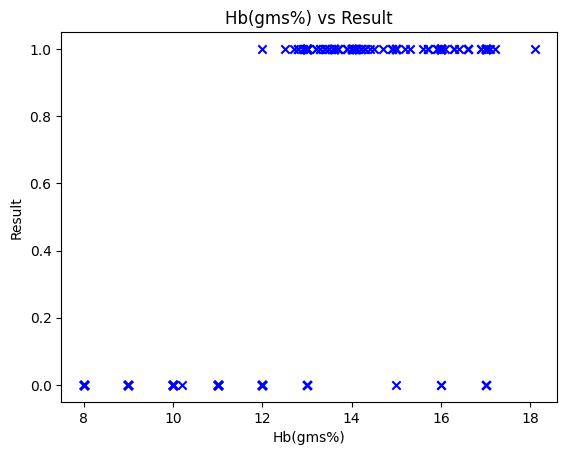

In [7]:
plt.scatter(data['Hb(gms%)'],data['result'], marker='x', c='b') 
# Set the title
plt.title("Hb(gms%) vs Result")
# Set the y-axis label
plt.ylabel('Result')
# Set the x-axis label
plt.xlabel('Hb(gms%)')
plt.show()

In [8]:
def zscore_normalize_features(X):
        # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

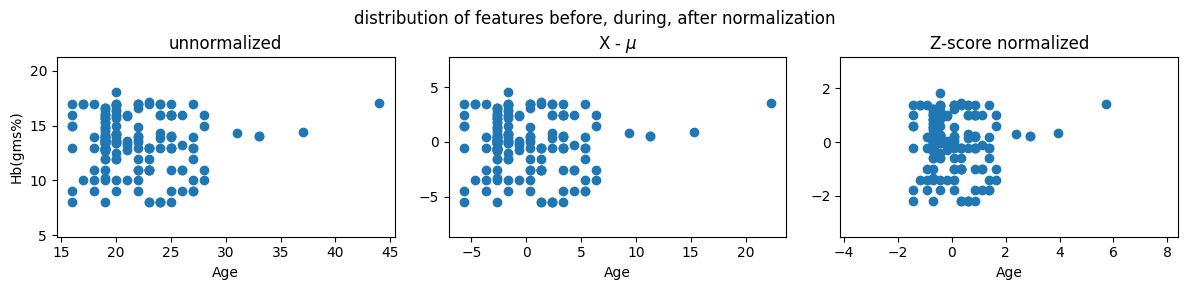

In [9]:
X_features = ['Age','Gender','Weight','Hb(gms%)']
mu     = np.mean(x_train,axis=0)   
sigma  = np.std(x_train,axis=0) 
X_mean = (x_train - mu)
X_norm = (x_train - mu)/sigma 

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [10]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (169, 5)
The shape of y_train is: (169,)
We have m = 169 training examples


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
x_lin = data_modf.drop(['result'],axis=1)
y_lin = data_modf[['result']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_lin,y_lin, test_size=0.2, random_state=0)

In [14]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (169, 4)
y_train: (169, 1)
X_test: (43, 4)
y_test: (43, 1)


In [15]:
x_train_arr = X_train.to_numpy()


In [16]:
lin_model = LogisticRegression()
lin_model.fit(x_lin,y_lin)

c:\Users\sivak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
for idx,col_name in enumerate(X_train.columns):
    print('coefficient for {} is {}'.format(col_name,lin_model.coef_[0][idx]))

coefficient for Age is 0.020565979416560222
coefficient for Gender is -0.3278893603618388
coefficient for Weight is -0.0032274990659107374
coefficient for Hb(gms%) is 1.0540027294291137


In [18]:
#predicts the output based on trained values
y_predi = lin_model.predict(X_test)
predict = pd.DataFrame(X_test)
predict['result'] = y_test
#predictded column is inserted in the dataset to compare with the oringinal output
predict['pred_result'] = y_predi
# len(predict)
predict

,Age,Gender,Weight,Hb(gms%),result,pred_result
206,32,0,90,13.0,1,1
37,19,0,59,14.9,1,1
89,25,0,75,11.0,0,0
190,28,0,79,8.0,0,0
149,22,1,49,10.0,0,0
75,20,0,89,15.9,1,1
96,20,1,59,12.0,0,0
137,19,0,48,11.0,0,0
5,19,0,67,16.6,1,1
83,23,0,102,11.0,0,0


In [19]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_predi)

0.9534883720930233